# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yauwa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\yauwa\anaconda3\envs\treeenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
api_key = os.getenv('news_api_key')

print(api_key)

a62d4ff8691649efb821c2ba8cbf1e37


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)
print(newsapi)

In [4]:
# Fetch the Bitcoin news articles
btc_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

# Show the total number of news
btc_news_en["totalResults"]

7153

In [5]:
# Fetch the Ethereum news articles
eth_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

eth_news_en["totalResults"]


2419

In [6]:
# Create the Bitcoin sentiment scores DataFrame
def sentiment_df(news):
    articles = []
    for article in news["articles"]:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(str(title)+" "+str(description) +" "+ str(title))
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
# Create the Ethereum sentiment scores DataFrame
bitcoin_sentiment_df = sentiment_df(btc_news_en)


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df

compound        date                                        description  \
0    -0.0900  2021-08-06  Yes, yes, the dirt is horrifying. But it’s als...   
1     0.1680  2021-07-19  Autonomous vehicles use the equivalent of 200 ...   
2     0.8016  2021-07-23  Hello friends and welcome to Daily Crunch, bri...   
3     0.7264  2021-07-14  While retail investors grew more comfortable b...   
4     0.2732  2021-07-21  As longtime TechCrunch readers know well, Mich...   
5     0.6249  2021-07-28  Bitcoin broke above $40,000 on Wednesday and h...   
6    -0.8720  2021-07-21               The hack was part of a Bitcoin scam.   
7    -0.2960  2021-07-21  Bitcoin recovered from a one-month low and bro...   
8    -0.2960  2021-07-21  Bitcoin recovered from a one-month low and bro...   
9     0.0000  2021-07-29  Tech earnings continue to beat expectations, R...   
10   -0.5267  2021-07-13         Stick to your plan. Don't bite at bitcoin.   
11    0.8220  2021-07-21  Electric-car maker Tesla Inc <a href="https://...   
12   -0.8807  2021-07-09  Ransomware attacks, fueled by COVID-19 pandemi...   
13   -0.7096  2021-07-13  The REvil group has been blamed for cyber-atta...   
14    0.4404  2021-07-08  Circle has announced that it plans to become a...   
15   -0.3818  2021-07-20  Bitcoin  fell on Tuesday to its lowest in almo...   
16    0.1779  2021-07-26  Amazon.com Inc on Monday denied a media report...   
17    0.0000  2021-07-22  Tesla is likely to start taking bitcoin again,...   
18    0.7650  2021-07-26  Tech giant might be preparing a big move—or si...   
19    0.7096  2021-08-03  The Ethereum platform's potential applications...   

    negative  neutral  positive  \
0      0.146    0.721     0.133   
1      0.000    0.957     0.043   
2      0.000    0.849     0.151   
3      0.000    0.914     0.086   
4      0.000    0.934     0.066   
5      0.053    0.816     0.131   
6      0.236    0.764     0.000   
7      0.110    0.830     0.061   
8      0.110    0.830     0.061   
9      0.000    1.000     0.000   
10     0.167    0.833     0.000   
11     0.000    0.843     0.157   
12     0.199    0.732     0.069   
13     0.223    0.777     0.000   
14     0.000    0.952     0.048   
15     0.060    0.940     0.000   
16     0.161    0.626     0.213   
17     0.000    1.000     0.000   
18     0.000    0.788     0.212   
19     0.038    0.823     0.139   

                                                 text  \
0   When my wife started a little garden in our ur...   
1   Like Dogecoin devotees, the mayor of Reno, and...   
2   To get a roundup of TechCrunchs biggest and mo...   
3   While retail investors grew more comfortable b...   
4   As longtime TechCrunch readers know well, Mich...   
5   SINGAPORE, July 28 (Reuters) - Bitcoin broke a...   
6   James Martin/CNET\r\nA UK man was arrested in ...   
7   A representation of virtual currency bitcoin i...   
8   By Reuters Staff\r\nFILE PHOTO: A representati...   
9   REUTERS/Dado Ruvic/Illustration\r\nWelcome to ...   
10  Opinions expressed by Entrepreneur contributor...   
11  Representations of virtual currency bitcoin ar...   
12  Ransomware attacks, fueled by COVID-19 pandemi...   
13  image captionThe group recently demanded a hug...   
14  Circle has announced that it plans to become a...   
15  LONDON, July 20 (Reuters) - Bitcoin fell on Tu...   
16  By Reuters Staff\r\nAmazon app is seen on a sm...   
17  Posted \r\nTesla is likely to start taking bit...   
18  22 with 21 posters participating\r\nAmazon pos...   
19  Representations of cryptocurrencies Bitcoin an...   

                                                title  
0            A Field Guide for Nature-Resistant Nerds  
1    Why Not Use Self-Driving Cars as Supercomputers?  
2   Daily Crunch: Bitcoin ‘is a big part of our fu...  
3   Crypto startup Phantom banks funding from Andr...  
4                        Michael Arrington’s next act  
5                Bitcoin rises above $40000 - Reuters  
6   UK man arreste

In [10]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df = sentiment_df(eth_news_en)
ethereum_sentiment_df


compound        date                                        description  \
0     0.8238  2021-07-16  There are many blockchain platforms competing ...   
1     0.8417  2021-07-29  Blockchain infrastructure startups are heating...   
2     0.7264  2021-07-14  While retail investors grew more comfortable b...   
3     0.8047  2021-08-05  Cent was founded in 2017 as an ad-free creator...   
4    -0.5267  2021-08-05  A major software upgrade on Ethereum, the seco...   
5     0.0000  2021-08-05  Ether  held near two-month highs on Thursday a...   
6     0.7096  2021-08-03  The Ethereum platform's potential applications...   
7     0.3400  2021-07-27  Bitcoin hit a six-week high of nearly $39,043 ...   
8     0.9042  2021-07-17  "Anthony Di Iorio, a co-founder of the Ethereu...   
9     0.5859  2021-07-30  Ethereum, the second-largest blockchain networ...   
10    0.0000  2021-07-29  Livepeer has raised $20 million for its decent...   
11    0.3400  2021-07-26  Xoycoin is the first Mexican cryptocurrency co...   
12    0.5267  2021-07-27  The NBA’s Chicago Bulls launched its first-eve...   
13   -0.5267  2021-07-21  BlockFi is a global app offering low-cost trad...   
14    0.6597  2021-07-15  This Ether ETF, which will be nicknamed QETH11...   
15    0.5267  2021-07-15  After a successful testnet deployement, the Lo...   
16    0.0000  2021-07-20  Polygon has set up a $100 million fund for pro...   
17    0.0000  2021-07-14  Federal Reserve Chair Jerome Powell said on We...   
18   -0.9287  2021-07-26  The U.S. Department of Justice is probing whet...   
19    0.8220  2021-07-21  Electric-car maker Tesla Inc <a href="https://...   

    negative  neutral  positive  \
0      0.000    0.858     0.142   
1      0.028    0.812     0.160   
2      0.000    0.914     0.086   
3      0.000    0.877     0.123   
4      0.089    0.911     0.000   
5      0.000    1.000     0.000   
6      0.038    0.823     0.139   
7      0.000    0.871     0.129   
8      0.000    0.794     0.206   
9      0.000    0.922     0.078   
10     0.000    1.000     0.000   
11     0.000    0.961     0.039   
12     0.000    0.905     0.095   
13     0.109    0.891     0.000   
14     0.000    0.888     0.112   
15     0.050    0.842     0.108   
16     0.000    1.000     0.000   
17     0.000    1.000     0.000   
18     0.250    0.674     0.076   
19     0.000    0.843     0.157   

                                                 text  \
0   There are many blockchain platforms competing ...   
1   Blockchain infrastructure startups are heating...   
2   While retail investors grew more comfortable b...   
3   Cent was founded in 2017 as an ad-free creator...   
4   Representation of the Ethereum virtual currenc...   
5   HONG KONG, Aug 5 (Reuters) - Ether held near t...   
6   Representations of cryptocurrencies Bitcoin an...   
7   Cryptocurrencies spiked Monday after Amazon li...   
8   "Anthony Di Iorio, a co-founder of the Ethereu...   
9   Representations of cryptocurrency Ethereum are...   
10  All the sessions from Transform 2021 are avail...   
11  This article was translated from our Spanish e...   
12  Shopify has made it possible for eligible sell...   
13  Personal Finance Insider writes about products...   
14  This article was translated from our Spanish e...   
15  After a successful testnet deployement, the Lo...   
16  All the sessions from Transform 2021 are avail...   
17  Representations of cryptocurrencies Bitcoin, E...   
18  By Reuters Staff\r\nA representation of the vi...   
19  Representations of virtual currency bitcoin ar...   

                                                title  
0   Crypto investors like Terraform Labs so much, ...  
1   Tenderly raises $15.3M to help Ethereum develo...  
2   Crypto startup Phantom banks funding from Andr...  
3   Cent, the platform that Jack Dorsey used to se...  
4   Ethereum major upgrade activated; ether stays ...  
5   Ether near two-month high ahead of major proto...  
6   Upgrades, ESG,

### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z ]")

# Expand the default stopwords list if necessary
sw_addon = {'said', 'an', 'ma', 'y', 'exp', '...','ect', 'did', 'of', 'char'}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Substitute everything that is NOT a letter with empty string
    text = regex.sub('', text)
    
    # Create a tokenized list of the words
    tokens = word_tokenize(text)
    
    # Remove the punctuation from text
    tokens = [word for word in tokens if word.lower() not in punctuation]    
    
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove the stop words
    # Substitute everything that is NOT a letter with empty string
    tokens = [word.lower() for word in tokens if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_sentiment_df["tokens"] = bitcoin_sentiment_df.apply(lambda row: tokenizer(row["title"]+" "+row["description"]+" "+row["text"]), axis=1)
bitcoin_sentiment_df.head()

compound        date                                        description  \
0   -0.0900  2021-08-06  Yes, yes, the dirt is horrifying. But it’s als...   
1    0.1680  2021-07-19  Autonomous vehicles use the equivalent of 200 ...   
2    0.8016  2021-07-23  Hello friends and welcome to Daily Crunch, bri...   
3    0.7264  2021-07-14  While retail investors grew more comfortable b...   
4    0.2732  2021-07-21  As longtime TechCrunch readers know well, Mich...   

   negative  neutral  positive  \
0     0.146    0.721     0.133   
1     0.000    0.957     0.043   
2     0.000    0.849     0.151   
3     0.000    0.914     0.086   
4     0.000    0.934     0.066   

                                                text  \
0  When my wife started a little garden in our ur...   
1  Like Dogecoin devotees, the mayor of Reno, and...   
2  To get a roundup of TechCrunchs biggest and mo...   
3  While retail investors grew more comfortable b...   
4  As longtime TechCrunch readers know well, Mich...   

                                               title  \
0           A Field Guide for Nature-Resistant Nerds   
1   Why Not Use Self-Driving Cars as Supercomputers?   
2  Daily Crunch: Bitcoin ‘is a big part of our fu...   
3  Crypto startup Phantom banks funding from Andr...   
4                       Michael Arrington’s next act   

                                              tokens  
0  [field, guide, natureresistant, nerds, yes, ye...  
1  [use, selfdriving, cars, supercomputers, auton...  
2  [daily, crunch, bitcoin, big, part, future, sa...  
3  [crypto, startup, phantom, bank, funding, andr...  
4  [michael, arringtons, next, act, longtime, tec...

In [15]:
# Create a new tokens column for Ethereum
ethereum_sentiment_df["tokens"] = ethereum_sentiment_df.apply(lambda row: tokenizer(row["title"]+" "+row["description"]+" "+row["text"]), axis=1)
ethereum_sentiment_df.head()

compound        date                                        description  \
0    0.8238  2021-07-16  There are many blockchain platforms competing ...   
1    0.8417  2021-07-29  Blockchain infrastructure startups are heating...   
2    0.7264  2021-07-14  While retail investors grew more comfortable b...   
3    0.8047  2021-08-05  Cent was founded in 2017 as an ad-free creator...   
4   -0.5267  2021-08-05  A major software upgrade on Ethereum, the seco...   

   negative  neutral  positive  \
0     0.000    0.858     0.142   
1     0.028    0.812     0.160   
2     0.000    0.914     0.086   
3     0.000    0.877     0.123   
4     0.089    0.911     0.000   

                                                text  \
0  There are many blockchain platforms competing ...   
1  Blockchain infrastructure startups are heating...   
2  While retail investors grew more comfortable b...   
3  Cent was founded in 2017 as an ad-free creator...   
4  Representation of the Ethereum virtual currenc...   

                                               title  \
0  Crypto investors like Terraform Labs so much, ...   
1  Tenderly raises $15.3M to help Ethereum develo...   
2  Crypto startup Phantom banks funding from Andr...   
3  Cent, the platform that Jack Dorsey used to se...   
4  Ethereum major upgrade activated; ether stays ...   

                                              tokens  
0  [crypto, investor, like, terraform, labs, much...  
1  [tenderly, raise, help, ethereum, developer, s...  
2  [crypto, startup, phantom, bank, funding, andr...  
3  [cent, platform, jack, dorsey, used, sell, fir...  
4  [ethereum, major, upgrade, activated, ether, s...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bitcoin_sentiment_df["n-gram"] = bitcoin_sentiment_df.apply(lambda row: Counter(ngrams(row["tokens"], n=2)), axis=1)
bitcoin_sentiment_df.head()

compound        date                                        description  \
0   -0.0900  2021-08-06  Yes, yes, the dirt is horrifying. But it’s als...   
1    0.1680  2021-07-19  Autonomous vehicles use the equivalent of 200 ...   
2    0.8016  2021-07-23  Hello friends and welcome to Daily Crunch, bri...   
3    0.7264  2021-07-14  While retail investors grew more comfortable b...   
4    0.2732  2021-07-21  As longtime TechCrunch readers know well, Mich...   

   negative  neutral  positive  \
0     0.146    0.721     0.133   
1     0.000    0.957     0.043   
2     0.000    0.849     0.151   
3     0.000    0.914     0.086   
4     0.000    0.934     0.066   

                                                text  \
0  When my wife started a little garden in our ur...   
1  Like Dogecoin devotees, the mayor of Reno, and...   
2  To get a roundup of TechCrunchs biggest and mo...   
3  While retail investors grew more comfortable b...   
4  As longtime TechCrunch readers know well, Mich...   

                                               title  \
0           A Field Guide for Nature-Resistant Nerds   
1   Why Not Use Self-Driving Cars as Supercomputers?   
2  Daily Crunch: Bitcoin ‘is a big part of our fu...   
3  Crypto startup Phantom banks funding from Andr...   
4                       Michael Arrington’s next act   

                                              tokens  \
0  [field, guide, natureresistant, nerds, yes, ye...   
1  [use, selfdriving, cars, supercomputers, auton...   
2  [daily, crunch, bitcoin, big, part, future, sa...   
3  [crypto, startup, phantom, bank, funding, andr...   
4  [michael, arringtons, next, act, longtime, tec...   

                                              n-gram  
0  {('field', 'guide'): 1, ('guide', 'natureresis...  
1  {('use', 'selfdriving'): 1, ('selfdriving', 'c...  
2  {('daily', 'crunch'): 3, ('crunch', 'bitcoin')...  
3  {('crypto', 'startup'): 1, ('startup', 'phanto...  
4  {('michael', 'arringtons'): 1, ('arringtons', ...

In [18]:
# Generate the Ethereum N-grams where N=2
ethereum_sentiment_df["n-gram"] = ethereum_sentiment_df.apply(lambda row: Counter(ngrams(row["tokens"], n=2)), axis=1)
ethereum_sentiment_df.head()

compound        date                                        description  \
0    0.8238  2021-07-16  There are many blockchain platforms competing ...   
1    0.8417  2021-07-29  Blockchain infrastructure startups are heating...   
2    0.7264  2021-07-14  While retail investors grew more comfortable b...   
3    0.8047  2021-08-05  Cent was founded in 2017 as an ad-free creator...   
4   -0.5267  2021-08-05  A major software upgrade on Ethereum, the seco...   

   negative  neutral  positive  \
0     0.000    0.858     0.142   
1     0.028    0.812     0.160   
2     0.000    0.914     0.086   
3     0.000    0.877     0.123   
4     0.089    0.911     0.000   

                                                text  \
0  There are many blockchain platforms competing ...   
1  Blockchain infrastructure startups are heating...   
2  While retail investors grew more comfortable b...   
3  Cent was founded in 2017 as an ad-free creator...   
4  Representation of the Ethereum virtual currenc...   

                                               title  \
0  Crypto investors like Terraform Labs so much, ...   
1  Tenderly raises $15.3M to help Ethereum develo...   
2  Crypto startup Phantom banks funding from Andr...   
3  Cent, the platform that Jack Dorsey used to se...   
4  Ethereum major upgrade activated; ether stays ...   

                                              tokens  \
0  [crypto, investor, like, terraform, labs, much...   
1  [tenderly, raise, help, ethereum, developer, s...   
2  [crypto, startup, phantom, bank, funding, andr...   
3  [cent, platform, jack, dorsey, used, sell, fir...   
4  [ethereum, major, upgrade, activated, ether, s...   

                                              n-gram  
0  {('crypto', 'investor'): 1, ('investor', 'like...  
1  {('tenderly', 'raise'): 1, ('raise', 'help'): ...  
2  {('crypto', 'startup'): 1, ('startup', 'phanto...  
3  {('cent', 'platform'): 1, ('platform', 'jack')...  
4  {('ethereum', 'major'): 1, ('major', 'upgrade'...

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10 = token_count(bitcoin_sentiment_df["tokens"].sum(), 10)

print(pd.DataFrame(bitcoin_top_10, columns=['Top 10 words', 'count']).set_index('Top 10 words'))

                  count
Top 10 words           
bitcoin              34
reuters              14
attack                8
wa                    7
tesla                 7
company               7
cryptocurrency        6
cryptocurrencies      6
musk                  6
reutersdado           6


In [21]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = token_count(ethereum_sentiment_df["tokens"].sum(), 10)

print(pd.DataFrame(ethereum_top_10, columns=['Top 10 words', 'count']).set_index('Top 10 words'))

                count
Top 10 words         
ethereum           34
reuters            13
blockchain         11
bitcoin            11
crypto             10
network            10
ether              10
like                8
ha                  8
cryptocurrency      8


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

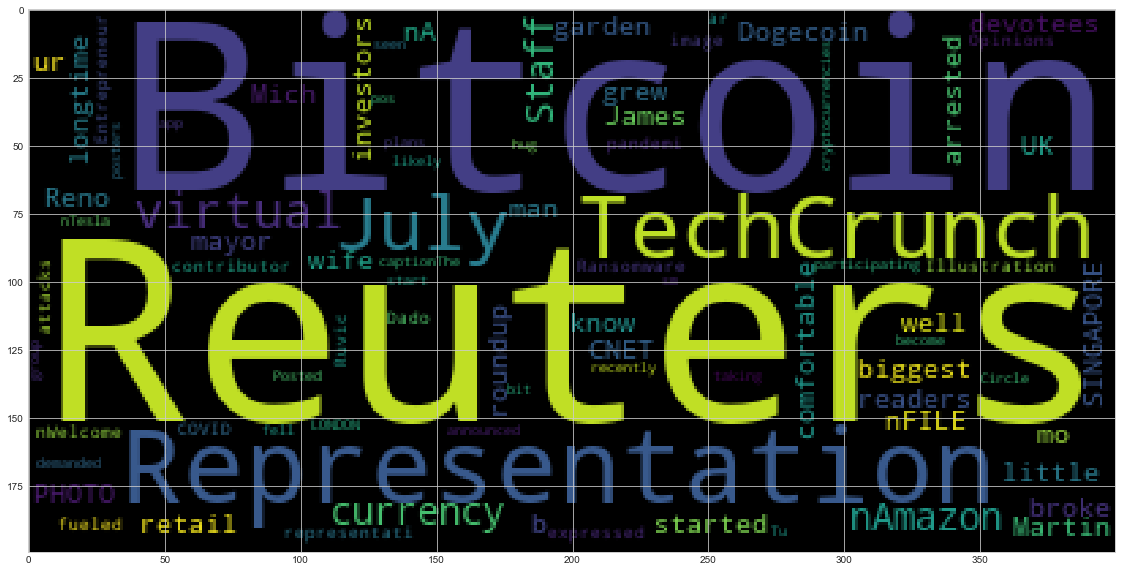

In [23]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(bitcoin_sentiment_df["text"].to_string())
plt.imshow(btc_wc)

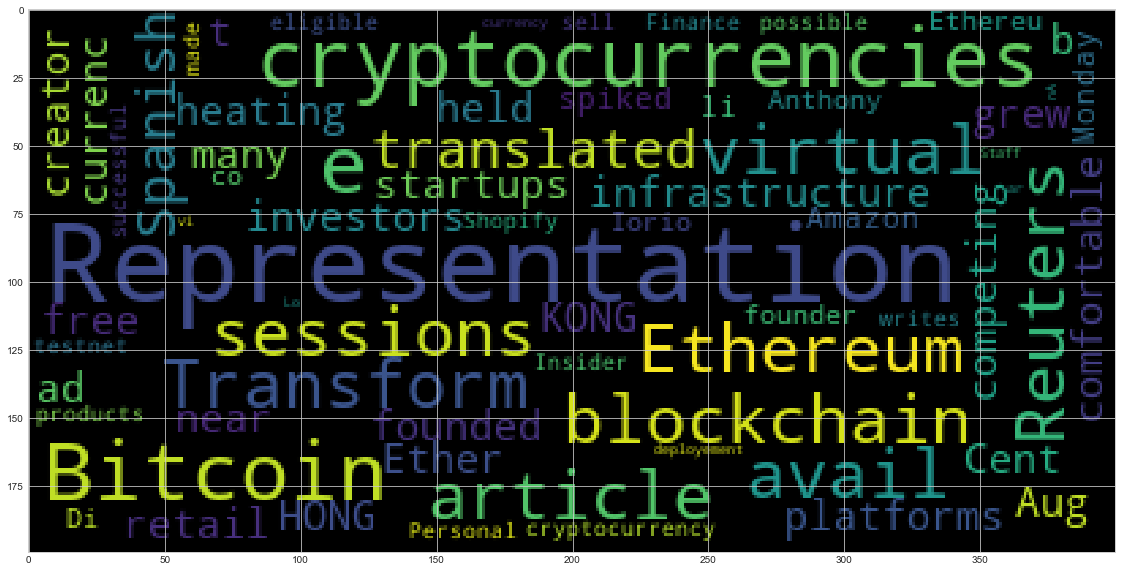

In [24]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(ethereum_sentiment_df["text"].to_string())
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy
from nltk.corpus import reuters

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
bitcoin_big_string = ' '.join(bitcoin_sentiment_df["title"]).join(bitcoin_sentiment_df["title"]).join(bitcoin_sentiment_df["title"])


In [29]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_big_string)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"


In [30]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')


In [31]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
ethereum_big_string = ' '.join(ethereum_sentiment_df["title"]).join(ethereum_sentiment_df["title"]).join(ethereum_sentiment_df["title"])


In [33]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_big_string)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"


In [34]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')


In [35]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.text, ent.label_)

Crypto ORG
Terraform Labs ORG
$150 million MONEY
Terraform Labs ORG
$150 million MONEY
Terraform Labs ORG
$150 million MONEY
15.3 MONEY
Ethereum PERSON
Crypto ORG
Phantom ORG
Andreessen Horowitz FAC
Jack Dorsey PERSON
first ORDINAL
NFT ORG
$3M MONEY
two-month DATE
DeFi GPE
Pantera Capital - Reuters ORG
Ethereum PERSON
Reuters ORG
$20M MONEY
Meet Xoycoin PERSON
Mexican NORP
Ethereum PERSON
20 CARDINAL
BlockFi PERSON
Brazil GPE
first ORDINAL
Latin America LOC
Ether Ethereum PERSON
Polygon Studio PERSON
$100M MONEY
NFT ORG
Fed ORG
Powell PERSON
Tether ORG
Bloomberg News - Reuters Tesla ORG
Musk - ReutersTenderly PERSON
15.3 MONEY
Ethereum PERSON
Terraform Labs ORG
$150 million MONEY
15.3 MONEY
Ethereum PERSON
Crypto ORG
Phantom ORG
Andreessen Horowitz FAC
Jack Dorsey PERSON
first ORDINAL
NFT ORG
$3M MONEY
two-month DATE
DeFi GPE
Pantera Capital - Reuters ORG
Ethereum PERSON
Reuters ORG
$20M MONEY
Meet Xoycoin PERSON
Mexican NORP
Ethereum PERSON
20 CARDINAL
BlockFi PERSON
Brazil GPE
first 

---